# 문제 02 유형(DataSet_02.csv 이용)
 구분자 : comma(“,”), 200 Rows, 6 Columns, UTF-8 인코딩

 환자의 상태와 그에 따라 처방된 약에 대한 정보를 분석하고자한다
 
 컬 럼 / 정 의  / Type
 Age  / 연령 / Integer
 Sex / 성별 / String
 BP / 혈압 레벨 / String
 Cholesterol / 콜레스테롤 레벨 /  String
 Na_to_k / 혈액 내 칼륨에 대비한 나트륨 비율 / Double
 Drug / Drug Type / String

In [1]:
import pandas as pd
import numpy as np

data02 = pd.read_csv('C:/Users/joey0/CodeStudy/proDS/Dataset/Dataset_02.csv')

## 1.해당 데이터에 대한 EDA를 수행하고, 여성으로 혈압이 High, Cholesterol이 Normal인 환자의 전체에 대비한 비율이 얼마인지 소수점 네 번째 자리에서 반올림하여 소수점 셋째 자리까지 기술하시오.

In [2]:
data02.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [6]:
q1 = data02[['Sex', 'BP', 'Cholesterol']].value_counts(normalize=True)

q1[('F','HIGH','NORMAL')] #정답 : 0.105

0.105

In [9]:
q1_1 = pd.crosstab(index=[data02['Sex'],data02['BP']], columns=data02['Cholesterol'], normalize=True)
q1_1

Cholesterol   HIGH  NORMAL
Sex BP                    
F   HIGH     0.085   0.105
    LOW      0.070   0.070
    NORMAL   0.090   0.060
M   HIGH     0.090   0.105
    LOW      0.085   0.095
    NORMAL   0.095   0.050

## 2. Age, Sex, BP, Cholesterol 및 Na_to_k 값이 Drug 타입에 영향을 미치는지 확인하기 위하여 아래와 같이 데이터를 변환하고 분석을 수행하시오. 
 - Age_gr 컬럼을 만들고, Age가 20 미만은 ‘10’, 20부터 30 미만은 ‘20’, 30부터 40 미만은 ‘30’, 40부터 50 미만은 ‘40’, 50부터 60 미만은 ‘50’, 60이상은 ‘60’으로 변환하시오. 
 - Na_K_gr 컬럼을 만들고 Na_to_k 값이 10이하는 ‘Lv1’, 20이하는 ‘Lv2’, 30이하는 ‘Lv3’, 30 초과는 ‘Lv4’로 변환하시오.
 - Sex, BP, Cholesterol, Age_gr, Na_K_gr이 Drug 변수와 영향이 있는지 독립성 검정을 수행하시오.
 - 검정 수행 결과, Drug 타입과 연관성이 있는 변수는 몇 개인가? 연관성이 있는 변수 가운데 가장 큰 p-value를 찾아 소수점 여섯 번째 자리 이하는 버리고 소수점 다섯 번째 자리까지 기술하시오.

In [13]:
q2 = data02.copy() #data02참조, 원본 보존 가능
#파생변수 생성
#np.where(조건) : 위치값 리턴
#np.where(조건,참,거짓) : 조건에 따라 실행

q2['Age_gr'] = np.where(q2.Age < 20,10,
                        np.where(q2.Age < 30,20,
                                np.where(q2.Age < 40,30,
                                        np.where(q2.Age < 50,40,
                                                np.where(q2.Age < 60,50,60)))))

q2['Na_K_gr'] = np.where(q2.Na_to_K <= 10, 'Lv1',
                         np.where(q2.Na_to_K <= 20, 'Lv2',
                                    np.where(q2.Na_to_K <= 30, 'Lv3', 'Lv4')))  

#카이스퀘어 검정
from scipy.stats import chi2_contingency                                                                                  

#빈도 산출
tab = pd.crosstab(index=q2.Sex, columns=q2.Drug)
tab                        

Drug,DrugY,drugA,drugB,drugC,drugX
Sex,,,,,
F,47,9,6,7,27
M,44,14,10,9,27


In [14]:
#카이스퀘어 검정 진행
#H0 : 서로 독립이다
#H1 : 서로 독립이 아니다
q2_out = chi2_contingency(tab)
q2_out
#(2.119248418109203, #카이스퀘어 통계량 sum((O_ij - E_ij))^2/E_ij
# 0.7138369773987128, #p-value
# 4,
# array([[43.68, 11.04,  7.68,  7.68, 25.92],
#        [47.32, 11.96,  8.32,  8.32, 28.08]]))

(2.119248418109203,
 0.7138369773987128,
 4,
 array([[43.68, 11.04,  7.68,  7.68, 25.92],
        [47.32, 11.96,  8.32,  8.32, 28.08]]))

In [17]:
#반복문 적용
q2.columns
var_list =  ['Sex', 'BP', 'Cholesterol', 'Age_gr', 'Na_K_gr',]

q2_out = []
for i in var_list:
    tab = pd.crosstab(index=q2[i], columns=q2.Drug)
    q2_out0 = chi2_contingency(tab)
    pvalue = q2_out0[1]
    q2_out.append([i, pvalue])

q2_out = pd.DataFrame(q2_out, columns=['var', 'pvalue'])

#연관성 높은 변수 찾기
q2_out2 = q2_out[q2_out.pvalue < 0.05]

q2_out2.pvalue.max()
#답 : 0.00070

0.0007010113024729462

In [18]:
#[참고]
idx = q2_out2.pvalue.idxmax()
q2_out2.iloc[idx,:]

#연관성이 있는 변수
# 가운데 가장 큰 p-value를 찾아 소수점 여섯 번째 자리 이하는 버리고 소수점 다섯
# 번째 자리까지 기술

#[참고] 올림/내림 함수 사용
import math
int(0.0007 * 10000)
#math.ceil?
math.ceil(777.1234)
math.floor(777.1234)
math.ceil(0.0007*1000)/10000
math.floor(0.0007*1000)/10000

0.0

## 3.Sex, BP, Cholesterol 등 세 개의 변수를 다음과 같이 변환하고 의사결정나무를 이용한 분석을 수행하시오.
 - Sex는 M을 0, F를 1로 변환하여 Sex_cd 변수 생성
 - BP는 LOW는 0, NORMAL은 1 그리고 HIGH는 2로 변환하여 BP_cd 변수 생성
 - Cholesterol은 NORMAL은 0, HIGH는 1로 변환하여 Ch_cd 생성
 - Age, Na_to_k, Sex_cd, BP_cd, Ch_cd를 Feature로, Drug을 Label로 하여 의사결정나무를 수행하고 Root Node의 split feature와 split value를 기술하시오. 
 이 때 split value는 소수점 셋째 자리까지 반올림하여 기술하시오.

In [20]:
#파생변수(더미 생성)
q3 = data02.copy()
q3['Sex_cd'] = np.where(q3.Sex == 'M', 0, 1)
q3['BP_cd'] = np.where(q3.BP == 'Low', 0,
                       np.where(q3.BP == 'NORMAL', 1, 2))
q3['Ch_cd'] = np.where(q3.Cholesterol == 'NORMAL', 0, 1)

#의사결정나무 생성 시 파라메터
var_list = ['Age', 'Na_to_K', 'Sex_cd', 'BP_cd', 'Ch_cd']

from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text

In [22]:
dt = DecisionTreeClassifier().fit(q3[var_list], q3.Drug)
dt

DecisionTreeClassifier()

|--- Na_to_K <= 14.829
|   |--- BP_cd <= 1.500
|   |   |--- class: drugX
|   |--- BP_cd >  1.500
|   |   |--- Age <= 50.500
|   |   |   |--- Ch_cd <= 0.500
|   |   |   |   |--- Age <= 33.000
|   |   |   |   |   |--- Age <= 22.000
|   |   |   |   |   |   |--- class: drugX
|   |   |   |   |   |--- Age >  22.000
|   |   |   |   |   |   |--- Age <= 31.500
|   |   |   |   |   |   |   |--- class: drugA
|   |   |   |   |   |   |--- Age >  31.500
|   |   |   |   |   |   |   |--- Na_to_K <= 10.566
|   |   |   |   |   |   |   |   |--- class: drugA
|   |   |   |   |   |   |   |--- Na_to_K >  10.566
|   |   |   |   |   |   |   |   |--- class: drugX
|   |   |   |   |--- Age >  33.000
|   |   |   |   |   |--- Age <= 37.500
|   |   |   |   |   |   |--- class: drugX
|   |   |   |   |   |--- Age >  37.500
|   |   |   |   |   |   |--- Na_to_K <= 13.182
|   |   |   |   |   |   |   |--- Age <= 46.500
|   |   |   |   |   |   |   |   |--- Na_to_K <= 10.672
|   |   |   |   |   |   |   |   |   |--- class: dru

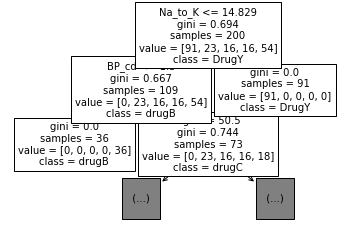

In [23]:
plot_tree(dt, max_depth=2,
          feature_names=var_list,
          class_names=list(q3.Drug.unique()), 
          precision=3,
          fontsize=10)

print(export_text(dt, 
                  feature_names=var_list,
                  decimals=3))

#정답 : Na_to_K, 14.829